In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import openslide
from skimage.filters import threshold_otsu
from skimage.transform import resize
import h5py

# Create a HDF5-File for testing

In [ ]:
path_to_camelyontif_tile_to_test = ''



# TESTING a created HDF5-FILE
This jupyter notebook is only for manual testing of a hdf5-file.

In [4]:
# parameters
path_to_tif = 'tiles.hdf5'

### Read the file

In [5]:
f = h5py.File(path_to_tif, mode='r')

### Check the shapes and names of the dataset

In [6]:
list(f)

['coord_real', 'coord_relative', 'img', 'mask', 'slide_name']

In [7]:
f['img'].shape

(3, 500, 512, 512, 3)

In [8]:
f['coord_relative'][:5]

array([[[18512, 87920],
        [18512, 88432],
        [18512, 88944],
        ...,
        [24656, 73584],
        [24656, 74608],
        [24656, 75120]],

       [[ 9127, 43831],
        [ 9127, 44087],
        [ 9127, 44343],
        ...,
        [12199, 36663],
        [12199, 37175],
        [12199, 37431]],

       [[ 4435, 21787],
        [ 4435, 21915],
        [ 4435, 22043],
        ...,
        [ 5971, 18203],
        [ 5971, 18459],
        [ 5971, 18587]]], dtype=uint64)

### Testing the mask and tissue tile from different levels

In [9]:
# parameters
index = 129
level_low = 0 # for the left column
level_high = 2 # for the right column

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


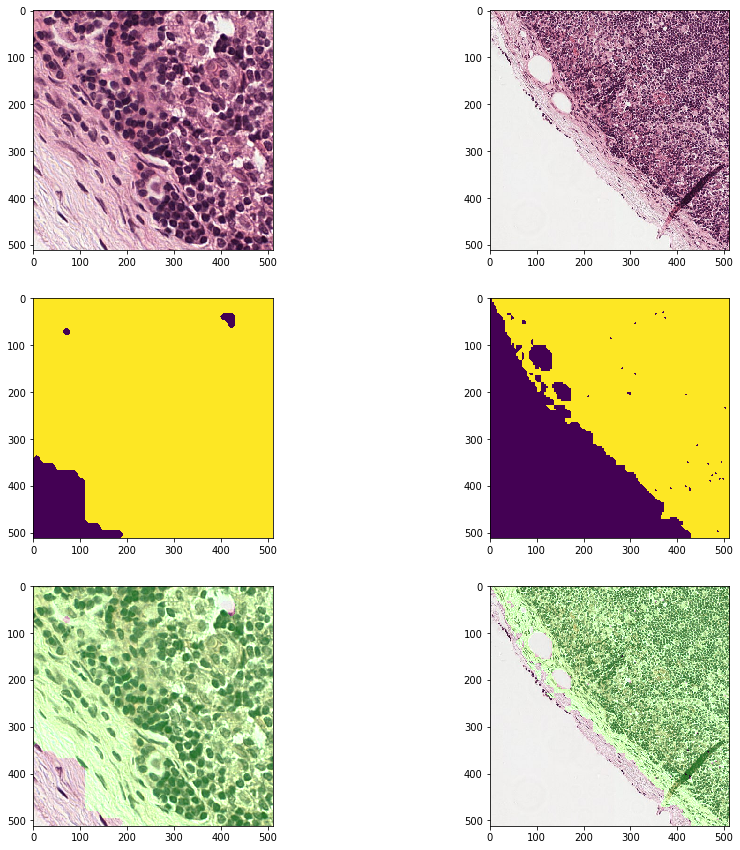

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.imshow(f['img'][level_low,index])
plt.subplot(3,2,2)
plt.imshow(f['img'][level_high,index])
plt.subplot(3,2,3)
plt.imshow(f['mask'][level_low,index])
plt.subplot(3,2,4)
plt.imshow(f['mask'][level_high,index])
plt.subplot(3,2,5)
l0 = np.int64(f['img'][level_low,index])
l0[:,:,1] += f['mask'][level_low,index] *100
plt.imshow(l0)
plt.subplot(3,2,6)
l1 = np.int64(f['img'][level_high,index])
l1[:,:,1] += f['mask'][level_high,index] *100
plt.imshow(l1)

# Use the information of the position to get one big tile again

In [66]:
# parameters
img_size = 2500
layer = 2
# reduce the pixel (for example 2 reduce the size of the image by two)
start_pos = f['coord_relative'][layer,:,:].min(axis=0)
reduce = int(np.max((512+f['coord_relative'][layer,:,:].max(axis=0) - f['coord_relative'][layer,:,:].min(axis=0)) / img_size))
start_pos = start_pos / reduce

499


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


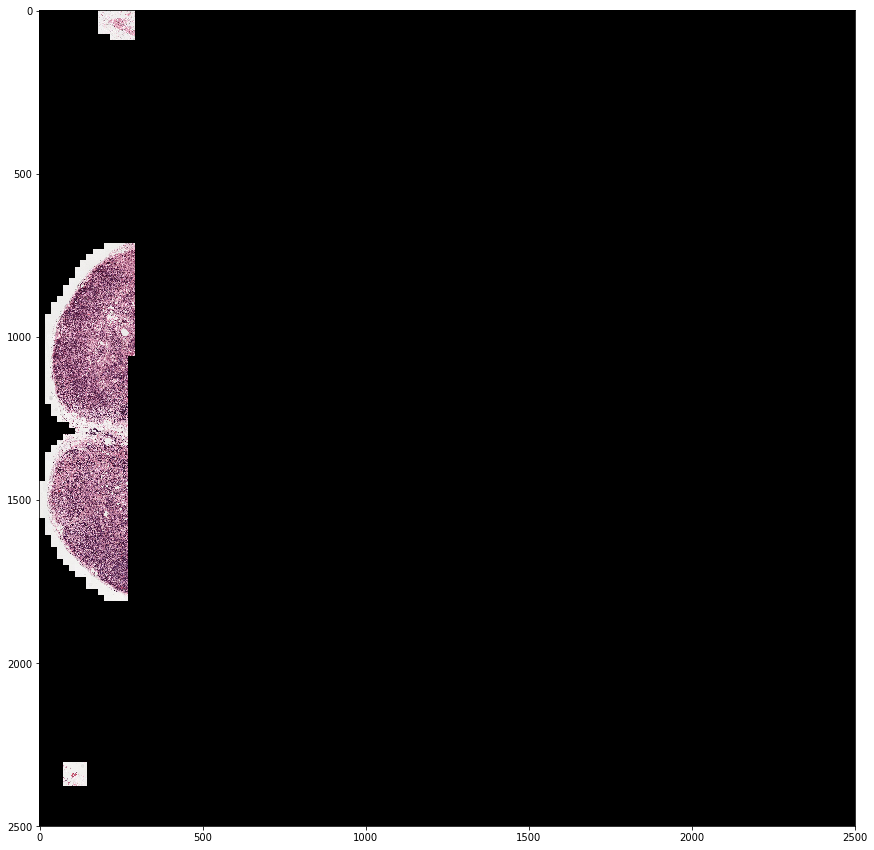

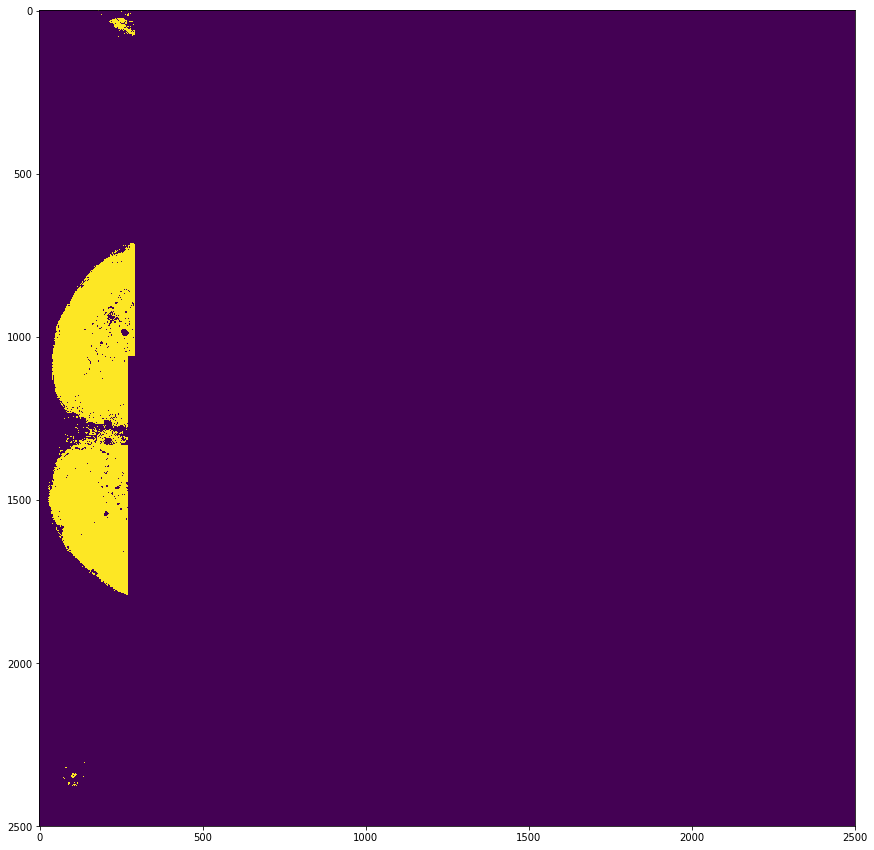

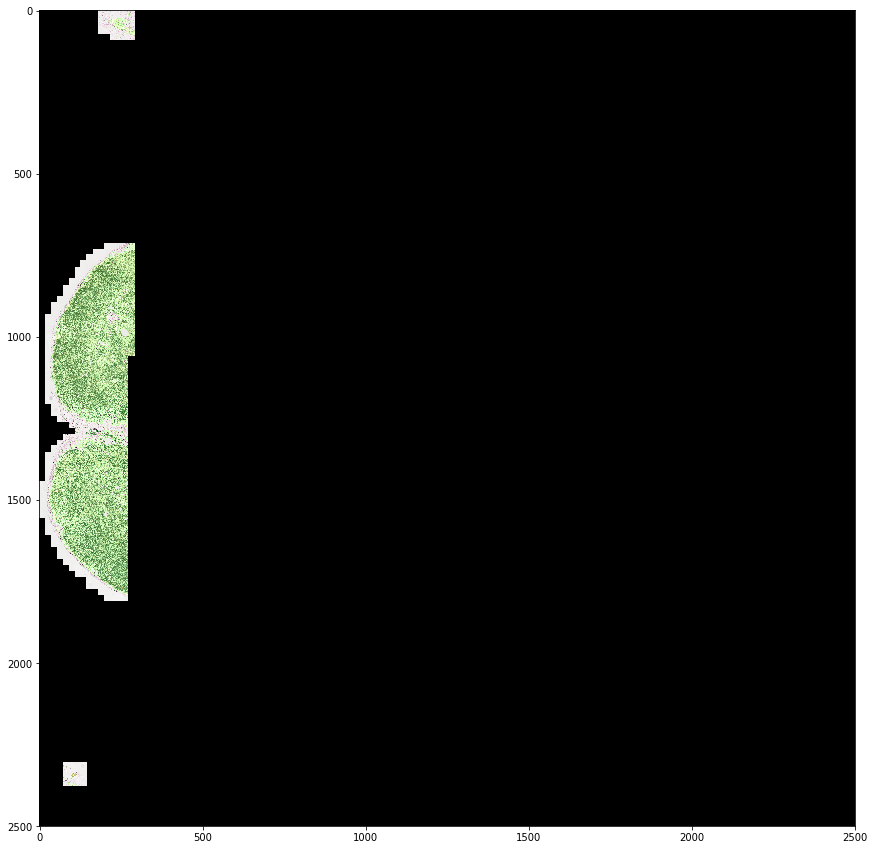

In [67]:
num_of_samples = f['img'].shape[1]
shape_of_img = f['img'].shape[2:4]
img  = np.zeros((img_size,img_size,3),dtype=np.uint8)
mask = np.zeros((img_size,img_size),  dtype=np.bool)

for i in range(num_of_samples):
    coord_relative = f['coord_relative'][layer,i]
    ys = int(int(coord_relative[0] // reduce)-start_pos[0])
    ye = int(ys + shape_of_img[0]// reduce) +1
    xs = int(int(coord_relative[1] // reduce)-start_pos[1])
    xe = int(xs + shape_of_img[1]// reduce) +1
    if (xs < 0 or ys < 0 or xe >= img_size or ye >= img_size) == False:
        img[xs:xe,ys:ye] = f['img'][layer,i][::reduce,::reduce]
        mask[xs:xe,ys:ye] = f['mask'][layer,i][::reduce,::reduce]
print(i)
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.figure(figsize=(15,15))
plt.imshow(mask)

plt.figure(figsize=(15,15))
img_mask = np.int64(img)
img_mask[:,:,1] += mask *100
plt.imshow(img_mask)

# check the overlapping

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


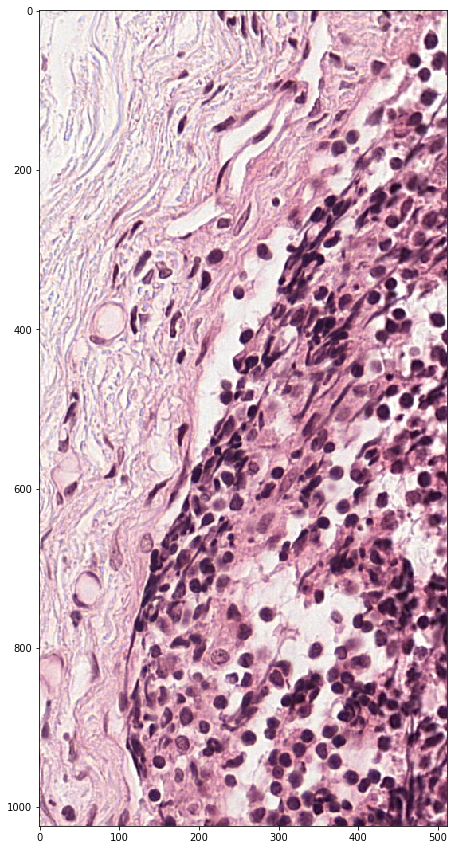

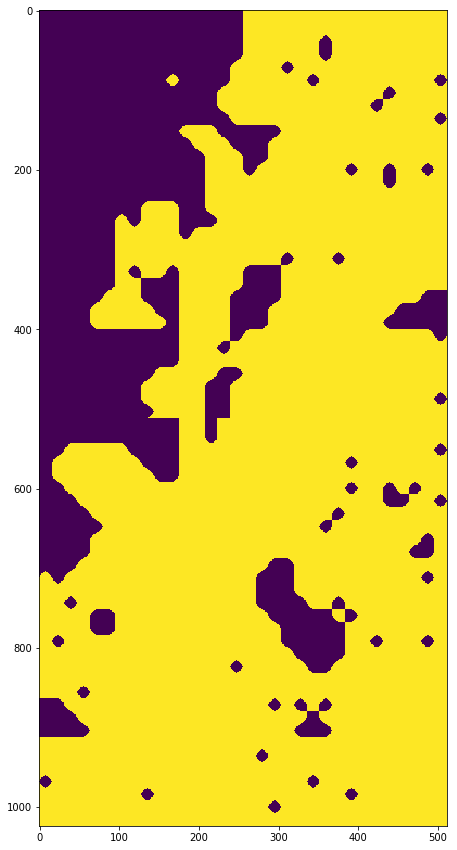

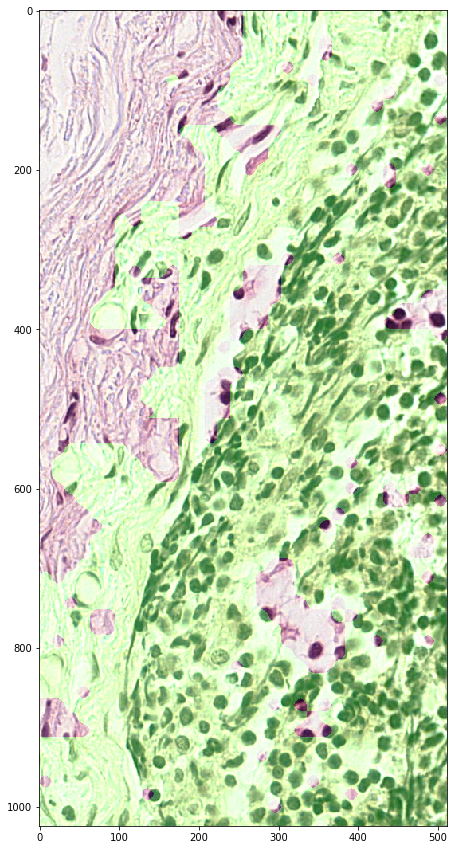

In [92]:
index = 15
num_of_samples = 2

shape = f['img'][0,index].shape

img = np.zeros((shape[0] * num_of_samples,shape[0],3),dtype=np.uint8)
mask = np.zeros((shape[0] * num_of_samples,shape[0]),dtype=np.uint8)

for i in range(num_of_samples):
    img[i*512 : (i+1)*512] = f['img'][0,index+i]
    mask[i*512 : (i+1)*512] = f['mask'][0,index+i]

    
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.figure(figsize=(15,15))
plt.imshow(mask)

plt.figure(figsize=(15,15))
img_mask = np.int64(img)
img_mask[:,:,1] += mask *100
plt.imshow(img_mask)

# check the real coordinates (with the openslide file) #TODO